## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [2]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [3]:
study_results


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# Combine the both data into a single dataset
# merge on mouse ID
comb_mousestudy_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

In [5]:
# Display the data table for preview
comb_mousestudy_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice.
mice_no_study = comb_mousestudy_df['Mouse ID'].count()
mice_no_study

1893

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 



In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
newmousedata = comb_mousestudy_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
newmousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
newmousedata["Mouse ID"].count()

1888

In [11]:
print(newmousedata['Tumor Volume (mm3)'].mean())
print(newmousedata['Tumor Volume (mm3)'].median())
print(newmousedata['Tumor Volume (mm3)'].var())   
print(newmousedata['Tumor Volume (mm3)'].std())
print(newmousedata['Tumor Volume (mm3)'].sem())

50.449276454131365
48.951421075
79.29127745388136
8.904564978362579
0.2049329125626731


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen Drug Regim

In [13]:
#Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
#mean, median, variance, standard deviation and SEM.
# Assemble the resulting series into a single summary dataframe.
# Groupby on drug regimen and get aggregates
newmousedata_drugs = newmousedata.groupby(['Drug Regimen'])
newmousedata_drugs.agg(['mean','median','var', 'std', 'sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
### sch_overall_math = passing_math.groupby(["school_name"]).count()["student_name"]
### sch_overall_math

In [15]:
### newschool_metrics_m.columns = ["school_name", "reading_score", "math_score","size","budget", "Student Budget", "% Overall Passing", "% Passing Math"]
### newschool_metrics_m

In [16]:
### create table that highlights the top 5 performing schools based on Overall Passing Rate
### Sort with newschool_metrics_all

### top_performing_df = newschool_metrics_summary.sort_values(by=['% Overall Passing'], ascending=False).head(5)
### top_performing_df

In [17]:
### Dataframe of all reading scores by grade

### combine_all_scores_df3 =pd.concat([combine_scores_df, combine_scores_df2], axis=1)
#3# combine_all_scores_df3

In [18]:
### create table that breaks down school performance based on average spending per student
### pick "newschool_metrics_summary" and drop irrelvant columns
### school_metrics.drop(columns=['0_x','0_y',0], inplace=True)

### school_spending_score = newschool_metrics_summary.drop(columns=['school_name', 'Total Students', 'Total School Budget'], inplace=True)

## Bar and Pie Charts

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

In [20]:
newmousedata_meas = newmousedata.groupby(['Drug Regimen'])['Timepoint']
newmousedata_meas.count()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [22]:
#sch_overall = passing_math_and_reading.groupby(["school_name"]).count()["student_name"]

newmousedata_meas = newmousedata['Drug Regimen'].value_counts()
newmousedata_meas

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

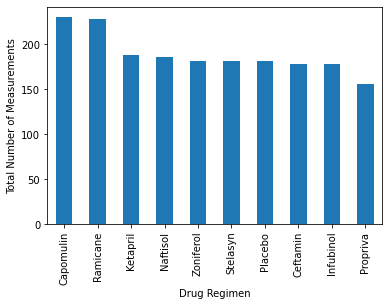

In [28]:
#use pandas to plot 
newmousedata_meas.plot(kind="bar")
plt.xlabel("Drug Regimen") 
plt.ylabel("Total Number of Measurements")

 # x= np.arange(170, 240, 10)
plt.show()

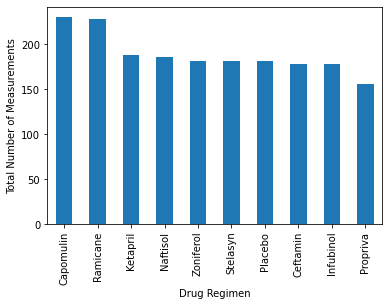

In [39]:
newmousedata_meas.plot(kind="bar")
plt.xlabel("Drug Regimen") 
plt.xticks(rotation=90)
plt.ylabel("Total Number of Measurements")

plt.bar

plt.show()                 

In [35]:

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


plt.bar(newmousedata_meas)
#.plot(kind="bar")
plt.xlabel("Drug Regimen") 
plt.ylabel("Total Number of Measurements")

# x= np.arange(170, 240, 10)
plt.show()

TypeError: 'Series' object is not callable

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
